# Requirements

In [ ]:
# ! python -m pip install sqlalchemy

In [1]:
from sqlalchemy import create_engine, ForeignKey, Column, String, Integer, VARCHAR, Boolean
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship

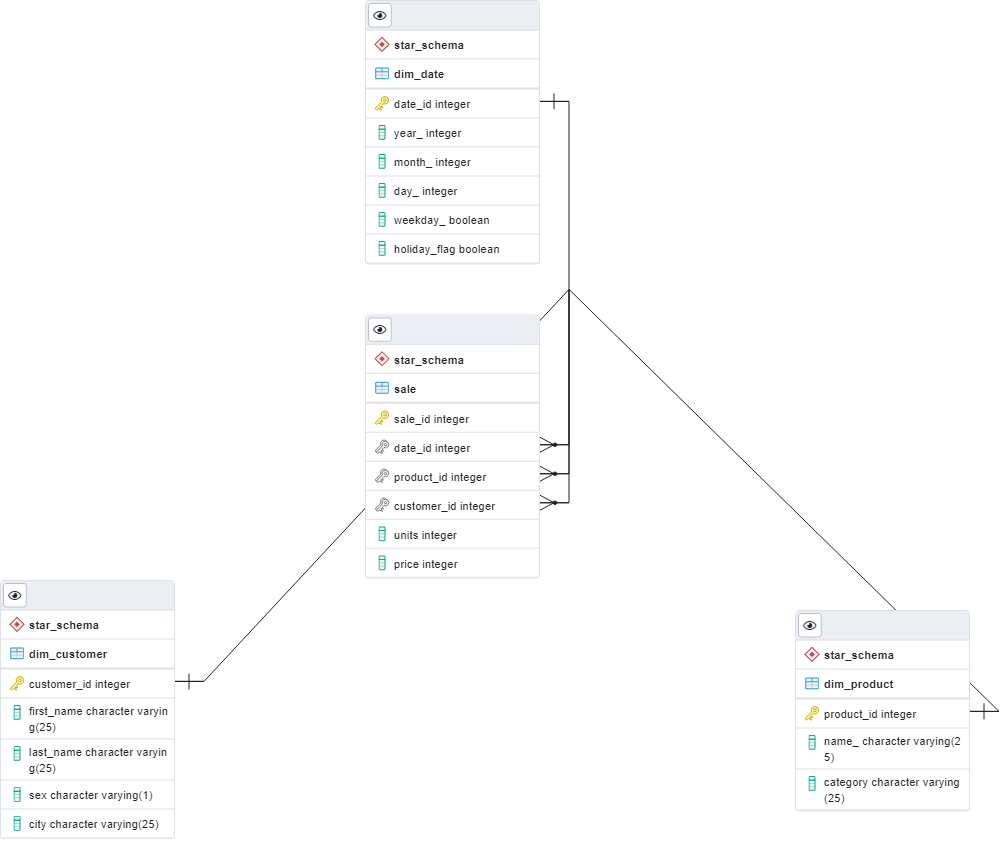

# Create Tables and Database

In [15]:
Base = declarative_base()


class Product(Base):
    __tablename__= 'dim_product'

    product_id = Column(Integer(), primary_key=True)
    name = Column(String(25))
    category = Column(String(25))

    sales = relationship('Sale', back_populates='product', cascade='all, delete')

    def __init__(self, product_id, name, category):
        self.product_id = product_id
        self.name = name
        self.category = category

    def __repr__(self):
        return f"<Product {self.name} [{self.category}]>"


class Customer(Base):
    __tablename__= 'dim_customer'

    customer_id = Column(Integer(), primary_key=True)
    first_name = Column(String(25))
    last_name = Column(String(25))
    sex = Column(VARCHAR()) # M/F
    city = Column(String(25))

    sales = relationship('Sale', back_populates='customer', cascade='all, delete')

    def __init__(self, customer_id, first_name, last_name, sex, city):
        self.customer_id = customer_id
        self.first_name = first_name
        self.last_name = last_name
        self.sex = sex
        self.city = city

    def __repr__(self):
        return f"<Customer {self.first_name} {self.last_name} [{self.sex}, {self.city}]>"


class Date(Base):
    __tablename__= 'dim_date'

    date_id = Column(Integer(), primary_key=True)
    year = Column(Integer())
    month = Column(Integer())
    day = Column(Integer())
    weekday = Column(Boolean())
    holiday_flag = Column(Boolean())

    sales = relationship('Sale', back_populates='date', cascade='all, delete')

    def __init__(self, date_id, year, month, day, weekday, holiday_flag):
        self.date_id = date_id
        self.year = year
        self.month = month
        self.day = day
        self.weekday = weekday
        self.holiday_flag = holiday_flag

    def __repr__(self):
        return f"<Date {self.day:02d}-{self.month:02d}-{self.year}>"


class Sale(Base):
    __tablename__= 'sale'
    
    sale_id = Column(Integer(), primary_key=True)
    date_id = Column(Integer(), ForeignKey('dim_date.date_id'))
    product_id = Column(Integer(), ForeignKey('dim_product.product_id'))
    customer_id = Column(Integer(), ForeignKey('dim_customer.customer_id'))
    units = Column(Integer(), nullable=False)
    price = Column(Integer(), nullable=False)
    
    product = relationship('Product', back_populates='sales')
    customer = relationship('Customer', back_populates='sales')
    date = relationship('Date', back_populates='sales')

    def __init__(self, sale_id, date_id, product_id, customer_id, units, price):
        self.sale_id = sale_id
        self.date_id = date_id
        self.product_id = product_id
        self.customer_id = customer_id
        self.units = units
        self.price = price

    def __repr__(self):
        return f"<Sale {self.sale_id} [{self.units}, {self.price}]>"

In [16]:
engine = create_engine("sqlite:///sales.db")
Base.metadata.create_all(bind=engine)

Session = sessionmaker(bind=engine)
session = Session()

# Insert Data

In [4]:
session.query(Sale).all()

[]

In [5]:
# Product
session.add( Product(1, 'Pulpen', 'Alat Tulis dan Penghapus') )
session.add( Product(2, 'Pensil', 'Alat Tulis dan Penghapus') )
session.add( Product(3, 'Rautan', 'Alat Tulis dan Penghapus') )
session.add( Product(4, 'Kertas A4', 'Buku dan Kertas') )
session.add( Product(5, 'Penghapus', 'Alat Tulis dan Penghapus') )
session.add( Product(6, 'Buku Tulis', 'Buku dan Kertas') )
session.add( Product(7, 'Gunting', 'Gunting dan Lem') )


# Customer
session.add( Customer(1, 'Bowie', 'Quincey', 'M', 'Tangerang Selatan') )
session.add( Customer(2, 'Kehlani', 'Ellisson', 'F', 'DKI Jakarta') )
session.add( Customer(3, 'Freddie', 'Hepburn', 'M', 'DKI Jakarta') )
session.add( Customer(4, 'Ebba', 'Ayers', 'F', 'Bandung') )


# Date
session.add( Date(1, 2023, 1, 13, True, False) )
session.add( Date(2, 2023, 1, 14, False, False) )
session.add( Date(3, 2023, 1, 15, False, False) )


# Sale
session.add( Sale(1, 1, 2, 2, 3, 3000) )
session.add( Sale(2, 1, 3, 2, 1, 2500) )
session.add( Sale(3, 2, 4, 1, 20, 200) )
session.add( Sale(4, 2, 7, 1, 1, 7000) )
session.add( Sale(5, 2, 1, 1, 1, 5000) )
session.add( Sale(6, 2, 2, 3, 1, 3000) )
session.add( Sale(7, 3, 5, 3, 2, 2500) )
session.add( Sale(8, 3, 6, 2, 1, 4000) )
session.add( Sale(9, 3, 7, 2, 1, 7000) )
session.add( Sale(10, 3, 6, 4, 3, 4000) )


# Commit session
session.commit()

# Querying


In [7]:
session.query(Sale).all()

[<Sale 1 [3, 3000]>,
 <Sale 2 [1, 2500]>,
 <Sale 3 [20, 200]>,
 <Sale 4 [1, 7000]>,
 <Sale 5 [1, 5000]>,
 <Sale 6 [1, 3000]>,
 <Sale 7 [2, 2500]>,
 <Sale 8 [1, 4000]>,
 <Sale 9 [1, 7000]>,
 <Sale 10 [3, 4000]>]

In [17]:
for sale in session.query(Sale).all():
    print(sale.product)

<Product Pensil [Alat Tulis dan Penghapus]>
<Product Rautan [Alat Tulis dan Penghapus]>
<Product Kertas A4 [Buku dan Kertas]>
<Product Gunting [Gunting dan Lem]>
<Product Pulpen [Alat Tulis dan Penghapus]>
<Product Pensil [Alat Tulis dan Penghapus]>
<Product Penghapus [Alat Tulis dan Penghapus]>
<Product Buku Tulis [Buku dan Kertas]>
<Product Gunting [Gunting dan Lem]>
<Product Buku Tulis [Buku dan Kertas]>


In [19]:
for date in session.query(Date).all():
    print(date.sales)

[<Sale 1 [3, 3000]>, <Sale 2 [1, 2500]>]
[<Sale 3 [20, 200]>, <Sale 4 [1, 7000]>, <Sale 5 [1, 5000]>, <Sale 6 [1, 3000]>]
[<Sale 7 [2, 2500]>, <Sale 8 [1, 4000]>, <Sale 9 [1, 7000]>, <Sale 10 [3, 4000]>]


In [20]:
for customer in session.query(Customer).all():
    print(customer.sales)

[<Sale 3 [20, 200]>, <Sale 4 [1, 7000]>, <Sale 5 [1, 5000]>]
[<Sale 1 [3, 3000]>, <Sale 2 [1, 2500]>, <Sale 8 [1, 4000]>, <Sale 9 [1, 7000]>]
[<Sale 6 [1, 3000]>, <Sale 7 [2, 2500]>]
[<Sale 10 [3, 4000]>]
